# Generating Paths for Monte Carlo Simulations

#### TLDR

This notebook contains a demo of the usage of classes to generate Monte Carlo paths for the below stochastic processes.
* Ornstein-Uhlenbeck
* Geometric Brownian Motion
* Brownian Bridge

The results are tested against the first and second moments' theoreticalk formulas. 

In [59]:
import os, sys
import datetime as dt
import numpy as np
import pandas as pd


In [60]:
# Append local dir for custom classes import
sys.path.append(os.path.abspath('../'))

In [61]:
# Import local classes
from src.models.gbm import *
from src.models.ou import OrnsteinUhlenbeckProcess
from src.models.bridge import BrownianBridge

In [62]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. Ornstein-Uhlenbeck Process

### 1.1 Formulation

This mean-reverting, stationary gaussian process is characterized by the Stochastic Differential Equation (SDE)

\begin{gather*}
dr_t = -\theta (r_t - \mu) dt + \sigma dW_t
\end{gather*}

for which a solution exists. It is given by the following stochastic integral equation

\begin{gather*}
r_t = r_0 e^{-\theta t} + \mu(1 - e^{-\theta t}) + \int_{0}^{t} \sigma e^{\theta(s-t)} dW_s.
\end{gather*}

This allows to obtain the first 2 moments, which will be used to validate the numerical results.

<b>Expectation:</b>

\begin{gather*}
E[r_t] = r_0 e^{-\theta t} + \mu (1 - e^{-\theta t})
\end{gather*}

<b>Variance:</b>

\begin{gather*}
V[r_t] = \frac{\sigma^2}{2 \theta} (1 - e^{-2 \theta t})
\end{gather*}


### 1.2 Python Class Demo

In [63]:
# Instantiate the process' class. The instance contains the 
# characteristics of the process, it can be called upon to generate paths. 
ou = OrnsteinUhlenbeckProcess(volatility=0.05, long_term_mean=0.15, mean_reversion=5.0, initial_value=0.050)

In [64]:
# Call upon the instance to generate 100 paths.
# returns paths as Pandas DataFrame
ou_paths = ou.generate(100, regenerate=True)

In [65]:
# Paths are returned as Pandas DataFrame
ou_paths.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0.000000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,...,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000
0.002740,0.055946,0.052401,0.053905,0.057185,0.056215,0.048820,0.053830,0.050967,0.051092,0.052428,...,0.050313,0.054538,0.051902,0.053899,0.052287,0.053197,0.051388,0.056003,0.051690,0.052405
0.005479,0.062120,0.050225,0.051910,0.060968,0.054442,0.055249,0.054063,0.050372,0.057436,0.057604,...,0.048308,0.056531,0.053134,0.052170,0.054976,0.054068,0.054736,0.059422,0.058651,0.057207
0.008219,0.062356,0.050961,0.056102,0.063882,0.057406,0.052335,0.055305,0.049809,0.059423,0.058606,...,0.048059,0.056552,0.060441,0.050746,0.055916,0.058329,0.056286,0.062170,0.058855,0.059432
0.010959,0.060153,0.056618,0.057073,0.063286,0.060397,0.052466,0.053126,0.047671,0.062459,0.059434,...,0.050921,0.057245,0.060741,0.047895,0.056437,0.057596,0.059791,0.066331,0.063907,0.062880
0.013699,0.059819,0.054988,0.060330,0.065392,0.057020,0.054717,0.056561,0.049217,0.063169,0.058567,...,0.049592,0.057597,0.064815,0.052658,0.064719,0.058661,0.059306,0.066132,0.062433,0.063863
0.016438,0.062041,0.056192,0.064400,0.065934,0.057381,0.054503,0.053588,0.046513,0.061285,0.063194,...,0.052370,0.059996,0.065403,0.051164,0.066793,0.060890,0.059318,0.066710,0.061206,0.064570
0.019178,0.059207,0.058553,0.063110,0.067697,0.054987,0.054268,0.054613,0.043604,0.062791,0.063389,...,0.054557,0.063687,0.062649,0.047888,0.066541,0.064937,0.059652,0.065778,0.062929,0.068545
0.021918,0.056687,0.056650,0.062242,0.071662,0.056890,0.061113,0.058345,0.044960,0.067266,0.065117,...,0.053886,0.064732,0.061505,0.052689,0.065443,0.063758,0.061075,0.064124,0.063010,0.067496
0.024658,0.061624,0.059963,0.063286,0.071711,0.060603,0.063375,0.060886,0.046321,0.064004,0.065980,...,0.053512,0.067119,0.065127,0.053557,0.062898,0.070125,0.060059,0.061285,0.070937,0.067568


<Axes: >

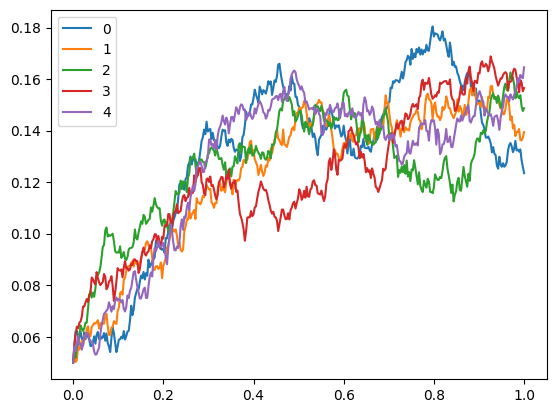

In [66]:
ou_paths.iloc[:, 0:5].plot()

<Axes: >

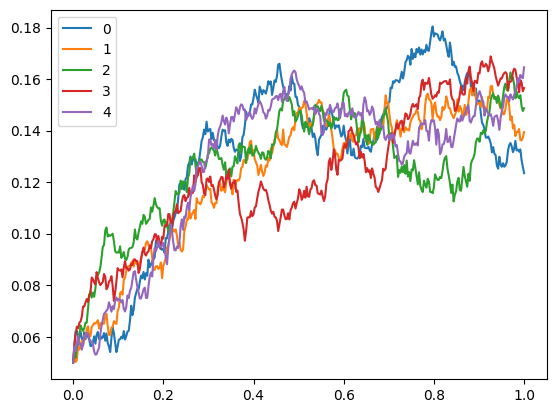

In [67]:
# Calling the same instance twice returns the same paths
ou_paths_2 = ou.generate(100, regenerate=False)  # <---  Regenerate is FALSE
ou_paths_2.iloc[:, 0:5].plot()

### 1.3 Validation against theory

The results are statistic in nature, their convergence depends on the number of paths produces and their specific realizations. 

#### 1.3.1 Expectation

In [81]:
ou.theoretical_expectation()

0.14932620530009144

In [82]:
ou_paths.iloc[-1, :].mean()

0.14756271685072492

#### 1.3.2 Variance

In [70]:
ou.theoretical_std_dev()

0.01581102937880894

In [71]:
ou_paths.iloc[-1, :].std()

0.015249604846758084

## 2. Geometric Brownian Motion

In [72]:
gbm = GeometricBrownianMotion(volatility=0.25, initial_value=1.0, maturity=1.0, time_intervals=365)

<Axes: >

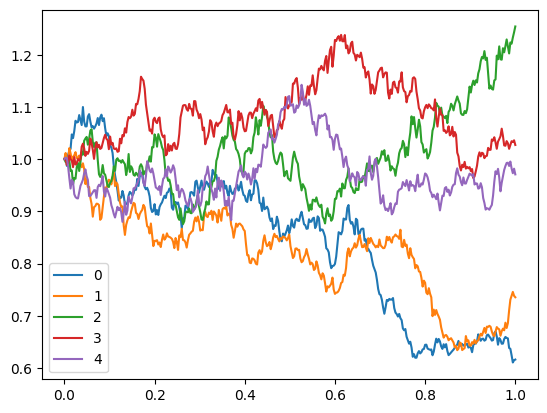

In [73]:
df_gbm = gbm(1000)
df_gbm.iloc[:, 0:5].plot()

In [74]:
np.mean(df_gbm.iloc[-1, :])

1.0072611387293624

In [75]:
gbm.theoretical_expectation()

1.0

In [76]:
df_gbm.iloc[-1, :].std()

0.2423000408197465

In [77]:
gbm.theoretical_std_dev()

0.2539575927548915

### Testing the OHLC Candle generator for the GBM

In [78]:
gbm_ohlc = GeometricBrownianMotionCandle(volatility=0.5, 
                                         sampling_rate=24, 
                                         drift=0.10, 
                                         time_intervals=365, 
                                         maturity=1)


In [79]:
df_gbm_ohlc = gbm_ohlc(5)
type(df_gbm_ohlc)

dict

In [80]:
df_gbm_ohlc.head()

AttributeError: 'dict' object has no attribute 'head'

### Testing the Brownian Bridge

In [ ]:
bb = BrownianBridge(0.25)

In [ ]:
paths_bb = bb.generate(1000)

In [ ]:
paths_bb.iloc[:, 0:5].plot()

In [ ]:
paths_bb.iloc[0,:].mean()

In [ ]:
paths_bb.iloc[-1,:].mean()

In [ ]:
paths_bb.std(axis=1).plot()